In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def insert(data, tree, func, year):
	key, val = func(data)
	if not val:
		return
	# traverse
	while tree and key != tree[2]:
		tree = tree[key > tree[2]]
	if tree:
	# add value to key
		tree[3][year].add(val)
	elif not year:
	# add key to tree
		tree.extend([[],[], key, [{val},set()]])

In [3]:
def get_kv(l):
	# we need the 13th column but quotes mix it up
	key, val, commas, quotes = "", "", 0, False
	for c in l:
		if c == '\"':
			quotes = not quotes
		elif c == ',' and not quotes:
			commas += 1
		elif commas == 13:
			key += c
		elif commas == 1 and (c.isupper() or c.isspace()):
			val += c
		elif commas == 14:
			# shorten val
			for f in ["FOR", "PRES", "AMER"]:
				if f in val:
					val = val[:val.find(f)]
			for r in ["FRIENDS OF", "COMMITTEE", "TO ELECT", "INC", "CAMPAIGN"]:
				val = val.replace(r,"")
			val.strip()
			return key, val

In [4]:
def tolist(tree):
	if tree:
		# we have a two sets and want to add all pairs between sets
		l = [(one, two) for one in tree[3][0] for two in tree[3][1]]
		return tolist(tree[0]) + l + tolist(tree[1])
	return []

In [5]:
def getd():
	# csv -> bst
	csvs = ["2016_2700s_0.csv","2016_2700s_1.csv","2020_2800s_0.csv","2020_2800s_1.csv"]
	tree = []
	[insert(line, tree, get_kv, n) for n in [0,1] for line in open(csvs[n],"r")]
	
	# bst -> list
	dnrs = [donr for donr in tolist(tree) if all(donr)] # ensure donations both cycles
	
	# list -> dict
	sxtn, twnt = set([donr[0] for donr in dnrs]), set([donr[1] for donr in dnrs])
	d = { s : { t : 0 for t in twnt } for s in sxtn } # init to zero
	for donr in dnrs:
		d[donr[0]][donr[1]] += 1 # compute frequencies 
		
	# frequency -> log of log of frequency
	d = { s : { t : d[s][t].bit_length().bit_length() for t in twnt } for s in sxtn }
			
	return d

In [6]:
getd()

{'CHRIS CHRISTIE ': {'CHRIS CHRISTIE ': 3,
  'MCAFEE ': 0,
  'JUDD WEISS  ': 0,
  'CARSON ': 0,
  'JEB  ': 3,
  'DONALD J TRUMP ': 3,
  'LINDSEY GRAHAM ': 2,
  'RAND PAUL ': 0,
  'SCOTT WALKER ': 1,
  'JINDAL ': 0,
  'KASICH ': 2,
  'CRUZ ': 2,
  'GILMORE ': 1,
  'MARCO RUBIO ': 3,
  'HUCKABEE ': 1,
  'JILL STEIN ': 0,
  'GARY JOHNSON ': 0,
  'HILLARY ': 3,
  'SANTORUM ': 0,
  'BERNIE ': 0,
  'MARK': 0,
  'PATAKI ': 0,
  'CARLY ': 2,
  'OMALLEY ': 0,
  'PERRY ': 2,
  'MCMULLIN ': 0},
 'MCAFEE ': {'CHRIS CHRISTIE ': 0,
  'MCAFEE ': 0,
  'JUDD WEISS  ': 1,
  'CARSON ': 0,
  'JEB  ': 0,
  'DONALD J TRUMP ': 0,
  'LINDSEY GRAHAM ': 0,
  'RAND PAUL ': 0,
  'SCOTT WALKER ': 0,
  'JINDAL ': 0,
  'KASICH ': 0,
  'CRUZ ': 0,
  'GILMORE ': 0,
  'MARCO RUBIO ': 0,
  'HUCKABEE ': 0,
  'JILL STEIN ': 0,
  'GARY JOHNSON ': 1,
  'HILLARY ': 0,
  'SANTORUM ': 0,
  'BERNIE ': 0,
  'MARK': 0,
  'PATAKI ': 0,
  'CARLY ': 0,
  'OMALLEY ': 0,
  'PERRY ': 0,
  'MCMULLIN ': 0},
 'JUDD WEISS  ': {'CHRIS CHRIS

In [7]:
c = getd()

In [27]:
candidates = []
counts = []
for key, val in c['CHRIS CHRISTIE '].items():
    candidates.append(key)
    counts.append(val)

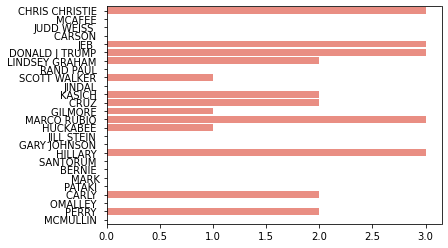

In [42]:
ax = sns.barplot(x=counts, y=candidates, color="salmon")